Dsecision Tree- Random Tree 

In [36]:
# Importing libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine
from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.preprocessing import LabelEncoder

# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#Splitting data into training and testing set
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import accuracy_score,confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
#from sklearn.metrics import f1_score, precision_score, recall_score

# for visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.tree import export_graphviz
from subprocess import call

In [2]:
# Loading data
titanic = pd.read_csv("titanic.csv")

Decision Tree

In [4]:
# Getting information about data 
titanic.info()
# Getting first 5 rows of dataset
titanic.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [5]:
# Getting shape of the dataset
titanic.shape

(891, 12)

In [6]:
# Getting all components of dataset
titanic.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [8]:
# Getting all the unique values in dataset
titanic.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [9]:
# Checking for any null values in dataset
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
# Dropping Cabin column from columns
titanic = titanic.drop(['Cabin'], axis = 1)

In [11]:
# Getting first 5 rows after dropping Cabin column
titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S

In [12]:
# Checking for any null values 
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [13]:
# Dropping null values from dataset
titanic = titanic.dropna()

In [14]:
# Checking for any null values in dataset
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [15]:
# Getting the colummn's names
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [16]:
 # Getting object type column's name
object_columns = titanic.columns[titanic.dtypes == 'object']
object_columns

Index(['Name', 'Sex', 'Ticket', 'Embarked'], dtype='object')

In [17]:
# Encoding categorical columns
for column in object_columns:
    titanic[column] = LabelEncoder().fit_transform(titanic[column])
titanic.apply(LabelEncoder().fit_transform) 

PassengerId  Survived  Pclass  Name  Sex  Age  SibSp  Parch  Ticket  \
0              0         0       2   103    1   28      1      0     407   
1              1         1       0   179    0   51      1      0     470   
2              2         1       2   317    0   34      0      0     531   
3              3         1       0   247    0   47      1      0      39   
4              4         0       2    15    1   47      0      0     372   
..           ...       ...     ...   ...  ...  ...    ...    ...     ...   
885          707         0       2   556    0   52      0      5     376   
886          708         0       1   460    1   35      0      0      82   
887          709         1       0   274    0   24      0      0      12   
889          710         1       0    80    1   34      0      0       8   
890          711         0       2   205    1   42      0      0     370   

     Fare  Embarked  
0      16         2  
1     180         0  
2      32         2  
3     163         2  
4      34         2  
..    ...       ...  
885   128         1  
886    72         2  
887   130         2  
889   130         0  
890    23         1  

[712 rows x 11 columns]

In [18]:
# Defining X and y
X = titanic.drop(columns = ['Survived'], axis = 1)
y = titanic['Survived']
X.shape

(712, 10)

In [19]:
# Spliting data into train, development and test data
r = 42 
# First, split data into training (80%) and temp (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.20, random_state = r)

# Then, split the temp set equally into validation (10%) and test (10%) sets
X_dev, X_test, y_dev, y_test = train_test_split(X_temp, y_temp, test_size = 0.5, random_state = 42)

In [20]:
# Scalling data
standard_scaler = StandardScaler()
standard_scaler.fit(X_train)
X_train_scaled = standard_scaler.transform(X_train)
X_dev_scaled = standard_scaler.transform(X_dev)
X_test_scaled = standard_scaler.transform(X_test)


Decision Tree

In [21]:
# Create Decision Tree classifer object
titanic_model = DecisionTreeClassifier(random_state = 42)

In [22]:
# Train Decision Tree Classifer
titanic_model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [23]:
# Model accuracy on the development set
print("Model's accuracy on development set")
print(titanic_model.score(X_dev, y_dev))

#Predict the response for test dataset
y_train_pred = titanic_model.predict(X_train)
y_test_pred = titanic_model.predict(X_test)

#Model Accuracy and Confusion Matrix, how often is the classifier correct
print(f'Training Accuracy: {accuracy_score(y_train, y_train_pred)}')
print(f'Testing Accuracy without pruning: {accuracy_score(y_test, y_test_pred)}')
print("At depth:", titanic_model.tree_.max_depth)



Model's accuracy on development set
0.6619718309859155
Training Accuracy: 1.0
Testing Accuracy without pruning: 0.6944444444444444
At depth: 20


Text(0.5, 1.0, 'Test Confusion Matrix')

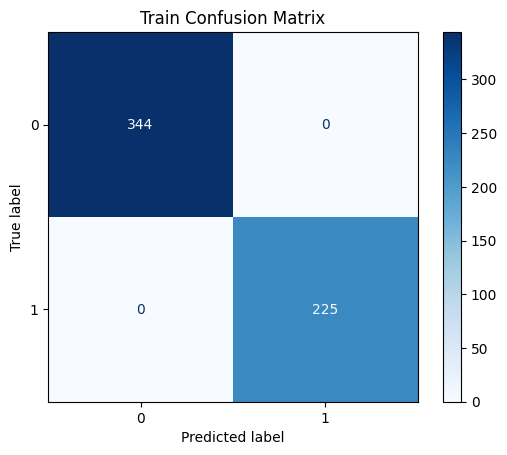

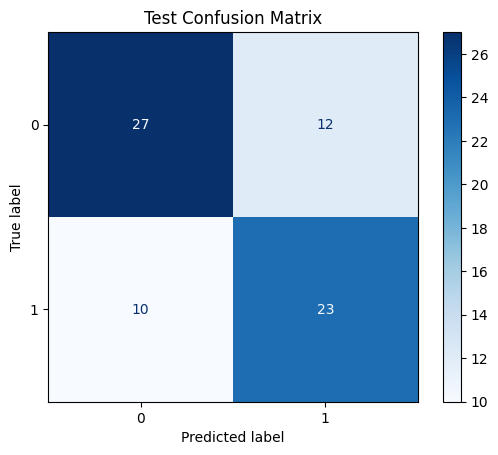

In [25]:
# Getting training Confusion matrix
cm = confusion_matrix(y_train, y_train_pred, labels = titanic_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels = titanic_model.classes_)
disp.plot(cmap='Blues')
plt.title('Train Confusion Matrix')

# Getting testing Confusion matrix
cm = confusion_matrix(y_test, y_test_pred, labels = titanic_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels = titanic_model.classes_)
disp.plot(cmap='Blues')
plt.title('Test Confusion Matrix')

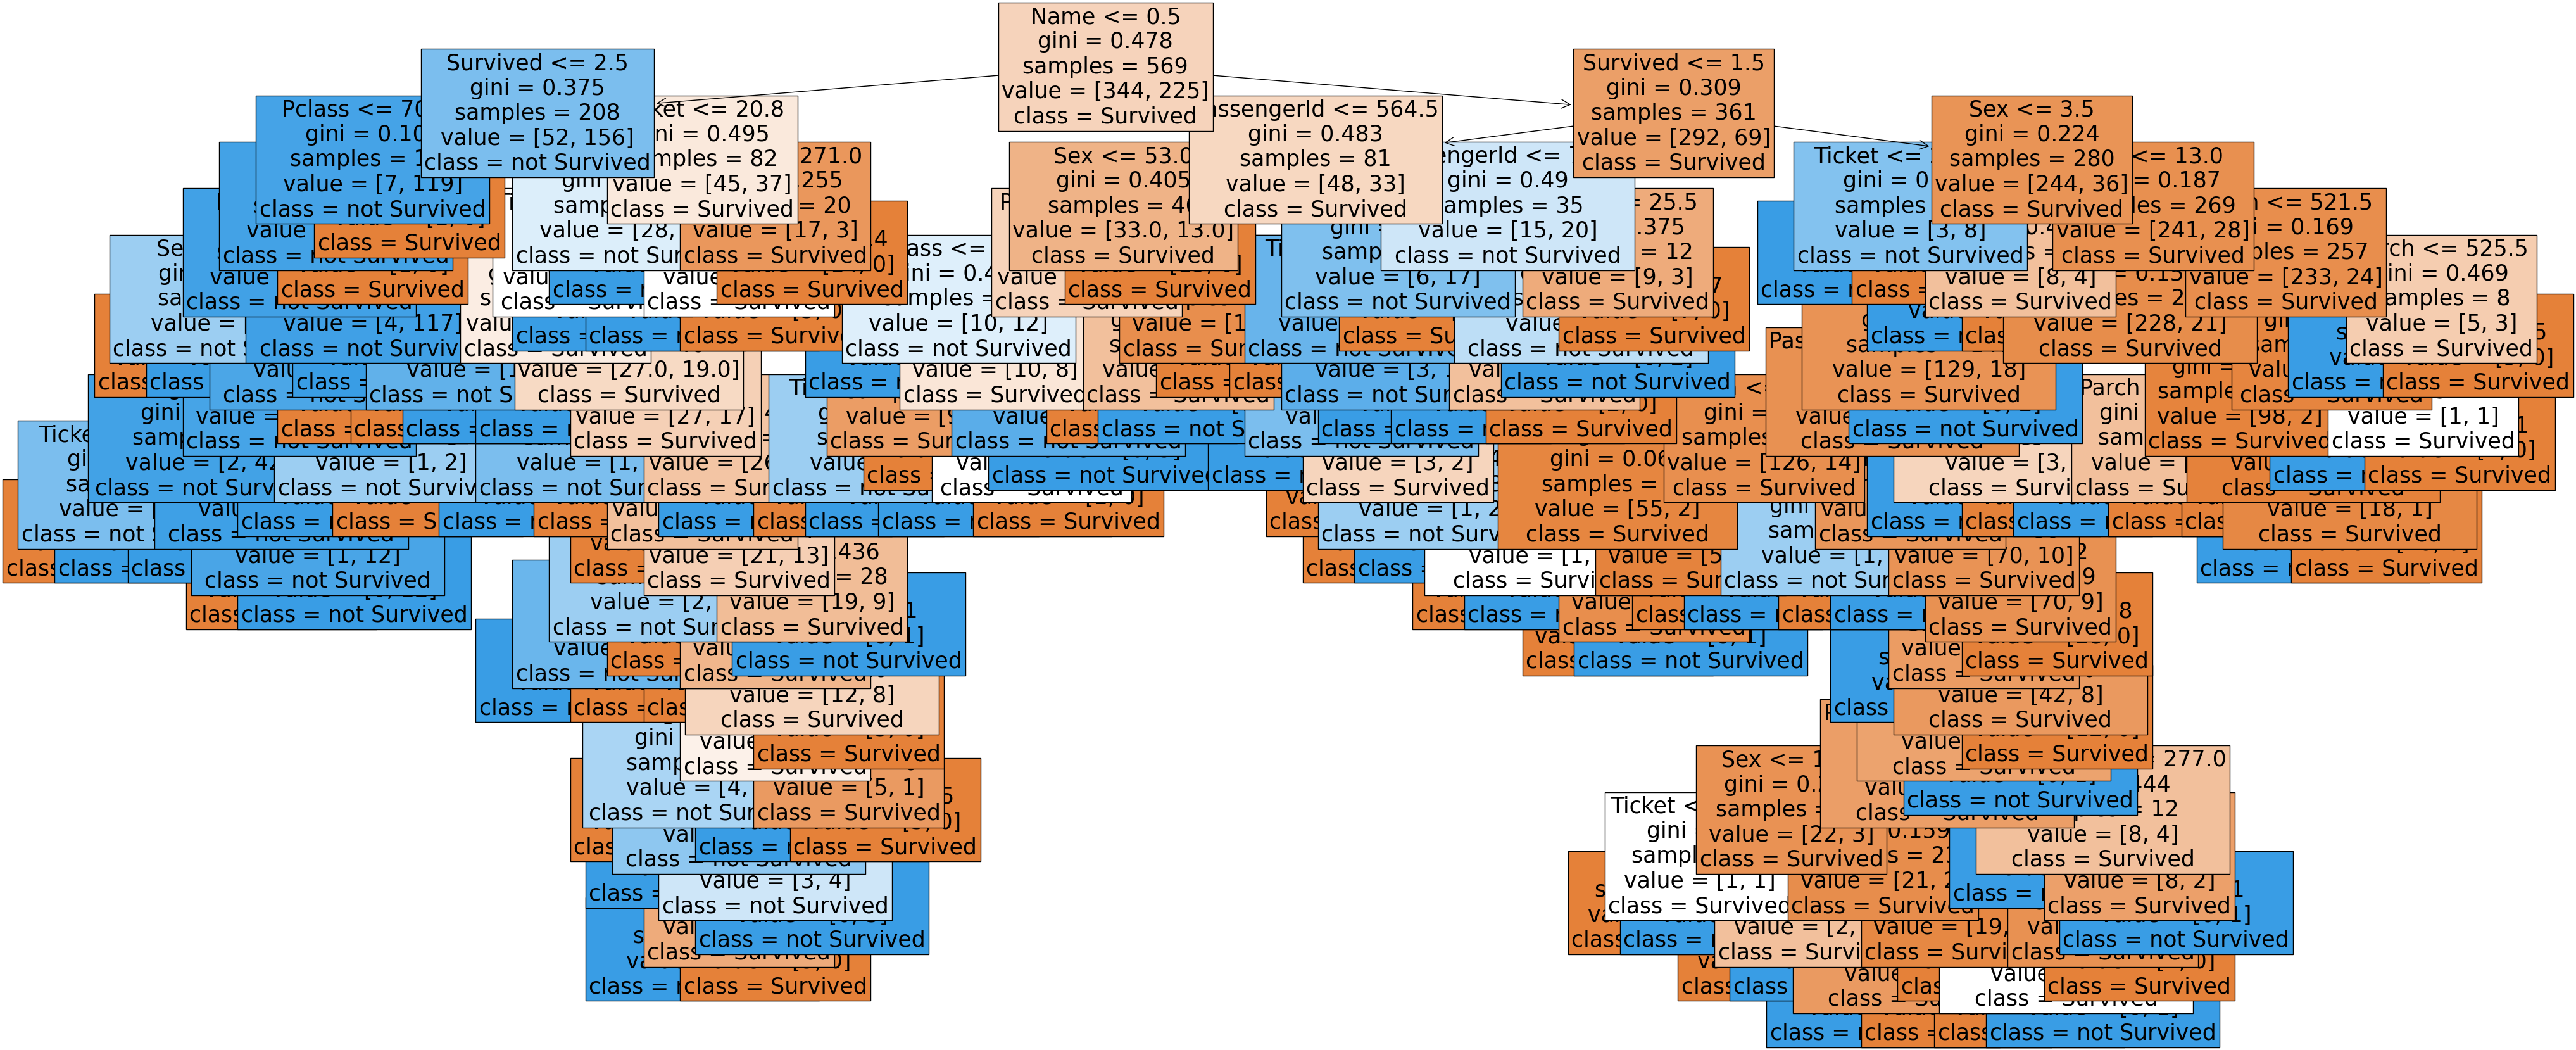

In [27]:
# Getting tree plot on unpruned data
plt.figure(figsize=(50,20))
features = titanic.columns
classes = ['Survived', 'not Survived']
tree.plot_tree(titanic_model,feature_names = features,class_names = classes,filled = True,fontsize = 25)
plt.show()

Text(0, 0.5, 'Accuracy')

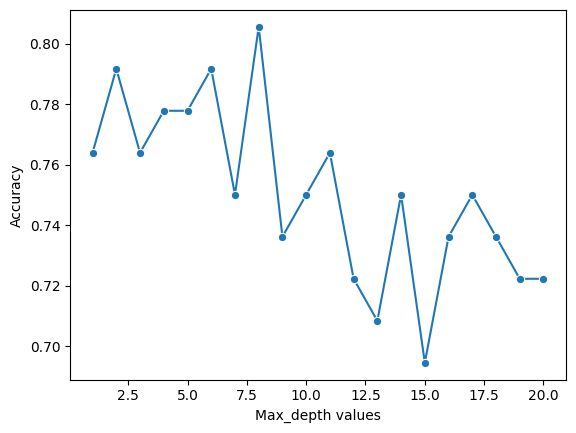

In [29]:

# Looking at effect of max_depth pruning   
pruned_depths = range(1, titanic_model.tree_.max_depth+1)

pruned_scores = [] 
for d in pruned_depths:
  clf = DecisionTreeClassifier(max_depth = d, random_state = 1)
  clf.fit(X_train, y_train)
  score = clf.score(X_test, y_test)
  pruned_scores.append(score)
  
# Ploting accuracy for max_depth
sns.lineplot(x = pruned_depths,y = pruned_scores, marker = "o")
plt.xlabel("Max_depth values")
plt.ylabel("Accuracy")

In [30]:
# fitting the chosen tree
best_depth = pruned_depths[np.argmax(pruned_scores)]
print('Best performance reached at depth of:', best_depth)

# Pruned = DecisionTreeClassifier for best_depth
pruned = DecisionTreeClassifier(criterion = "gini", max_depth=best_depth,random_state=r,min_samples_leaf=2)

# Train Decision Tree Classifer
pruned.fit(X_train,y_train)
#pruned.fit(X, y)

#Predict the response for test dataset
y_test_pred = pruned.predict(X_test)

# Model Accuracy, how often is the classifier correct
print("Training Accuracy:",accuracy_score(y_train, y_train_pred))
print("Testing Accuracy:",accuracy_score(y_test, y_test_pred))

Best performance reached at depth of: 8
Training Accuracy: 1.0
Testing Accuracy: 0.7777777777777778


In [32]:
# Initialize lists to store accuracies
train_accuracies = []
dev_accuracies = []

# Loop through different values of max_depth
for depth in range(2, 11):
    # Train the model with the current max_depth
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    
    # Predict and calculate accuracy for the training set
    train_pred = clf.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_pred)
    train_accuracies.append(train_accuracy)
    
    # Predict and calculate accuracy for the development set
    dev_pred = clf.predict(X_dev)
    dev_accuracy = accuracy_score(y_dev, dev_pred)
    dev_accuracies.append(dev_accuracy)

# Now create the DataFrame with the collected data
model_frame = pd.DataFrame({
    'max_depth': range(2, 11),
    'train accuracy': train_accuracies,
    'development accuracy': dev_accuracies
})

# Display the DataFrame
print(model_frame)


   max_depth  train accuracy  development accuracy
0          2        0.801406              0.704225
1          3        0.831283              0.774648
2          4        0.848858              0.676056
3          5        0.876977              0.633803
4          6        0.898067              0.732394
5          7        0.920914              0.633803
6          8        0.929701              0.661972
7          9        0.945518              0.661972
8         10        0.954306              0.676056


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


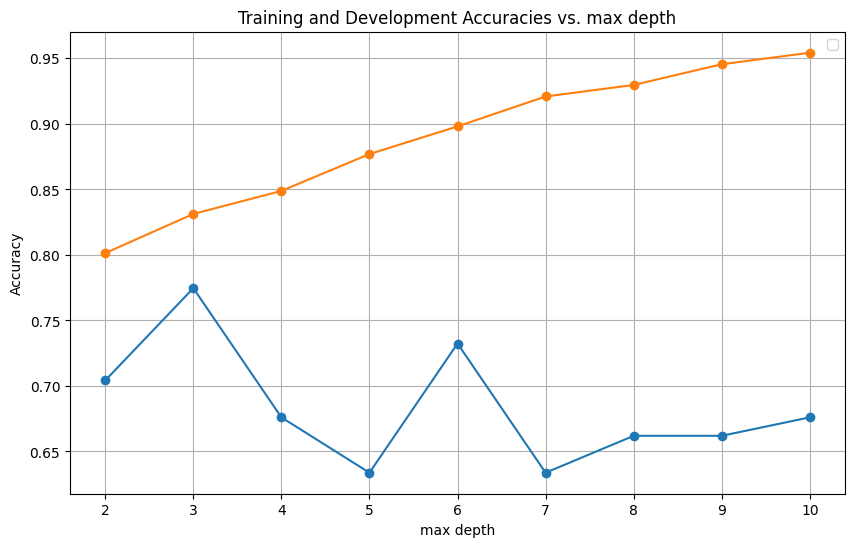

In [33]:
# Ploting training and development accuracies on same graph for range of max_depth
plt.figure(figsize=(10, 6))
plt.plot( model_frame['max_depth'] , model_frame['development accuracy'], marker = "o")
plt.plot( model_frame['max_depth'], model_frame['train accuracy'], marker = "o")
plt.xlabel('max depth')
plt.ylabel('Accuracy')
plt.title('Training and Development Accuracies vs. max depth')
plt.legend()
plt.grid(True)
plt.show()

Explanation

Training Accuracy Line Shape:
Initially the tree depth is increasing and because the model is becoming more complex, the training data fits better.
If the training accuracy line continues to increase and reaches near 100%, it indicates the model is potentially overfitting the training data.

Development Accuracy Line Shape:

The development accuracy (validation accuracy) initially increases with the tree depth as the model better captures the underlying patterns in the data.
However, after a certain point, the development accuracy may start to decrease or plateau. This is because the model becomes too complex and starts to overfit the training data, leading to poor generalization on the development set.
Interpretation of the Shapes

Underfitting:
If both the training and development accuracies are low and increase together as the tree depth increases, the model is underfitting the data. This means the model is too simple to capture the underlying patterns.

Good Fit:
If the training accuracy is high and the development accuracy is close to the training accuracy but not decreasing, it indicates a good fit. The model is capturing the underlying patterns without overfitting.

Overfitting:
If the training accuracy is very high and the development accuracy starts to decrease after a certain depth, it indicates overfitting. The model is becoming too complex and is fitting the noise in the training data rather than the underlying pattern. 

Analysis shapes of the lines based on the graph:

At lower depths, both accuracies might be low, indicating underfitting.
As the depth increases, both accuracies increase, indicating the model is better fitting the data.
At some pointS, the development accuracy start to decrease, but the training accuracy continues to increase, indicating overfitting.
By identifying the point where the development accuracy starts to decrease or level off,  can choose the optimal tree depth that balances bias and variance, leading to better generalization on unseen data.

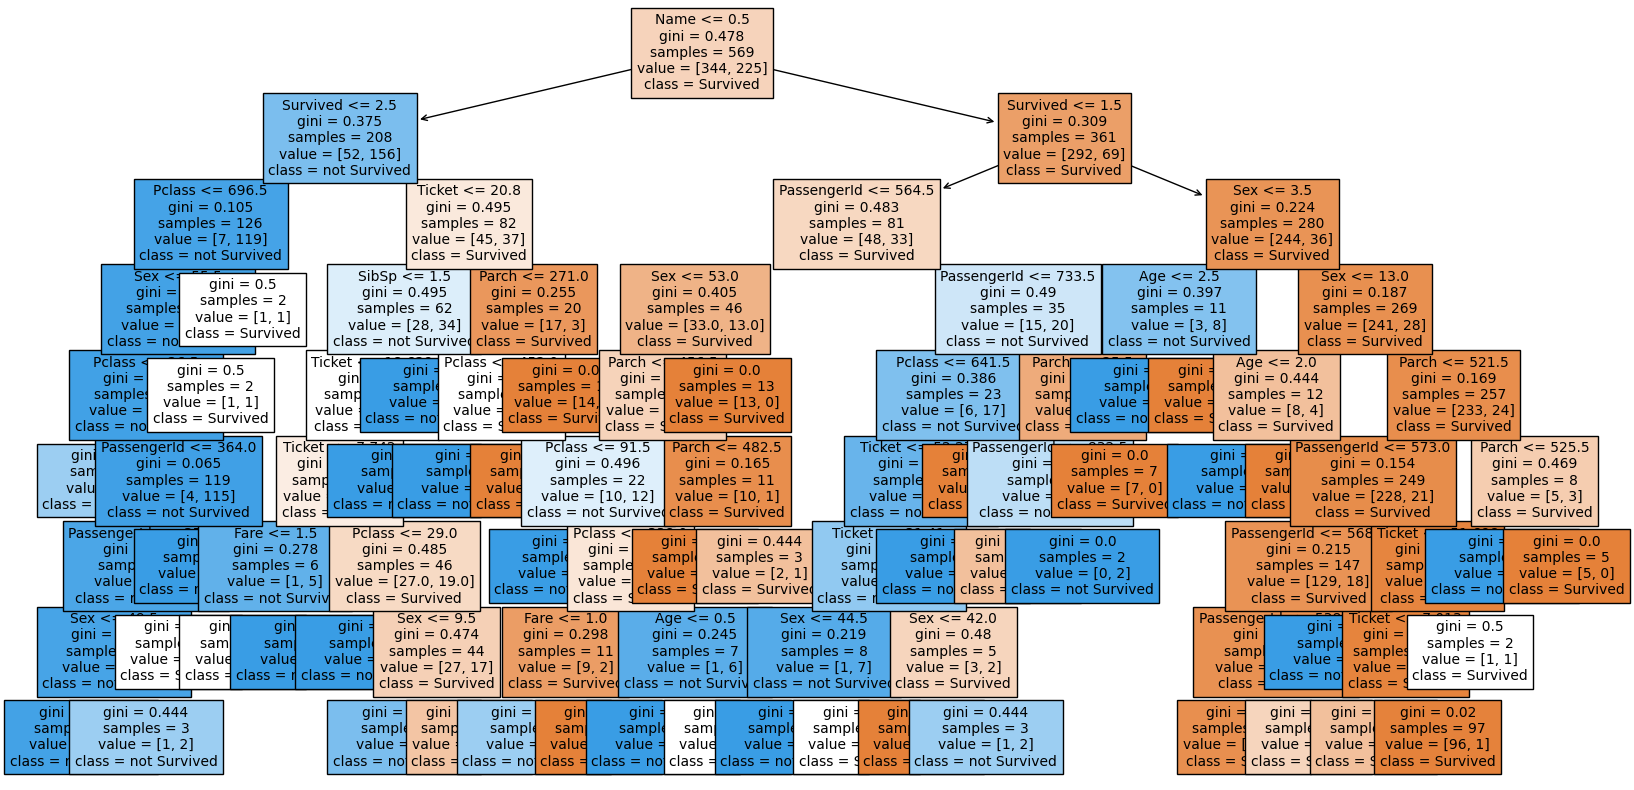

In [34]:
# Ploting tree with pruned features
plt.figure(figsize = (20,10))
features = titanic.columns
classes = ['Survived', 'not Survived']
tree.plot_tree(pruned,feature_names = features,class_names = classes,filled = True,fontsize = 10)
plt.show()

In [35]:
# Evaluate the final model on the test data
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_test, y_test)
test_predictions = clf.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)

print(f"Final Model Test Accuracy: {test_accuracy:.4f}")

Final Model Test Accuracy: 0.9028


Random Forest

In [37]:
# Creating Random Forest Classifier
r = 42
rf = RandomForestClassifier(random_state=r)

# Train the RF classifier
rf.fit(X_train,y_train)

# Predicting the response for test dataset for the models
y_test_pred_rf = rf.predict(X_test)

print(f'Testing Accuracy for Random Forest model: {accuracy_score(y_test, y_test_pred_rf)}')

Testing Accuracy for Random Forest model: 0.8333333333333334


In [45]:
# Finding the important features using the built-in Gini importance
importances = rf.feature_importances_
feature_imp_titanic = pd.DataFrame({'Feature': X_train.columns, 'Gini Importance': importances}).sort_values('Gini Importance', ascending = False)
feature_imp_titanic


Feature  Gini Importance
3          Sex         0.240653
7       Ticket         0.146561
8         Fare         0.128370
4          Age         0.119728
0  PassengerId         0.113214
2         Name         0.105254
1       Pclass         0.080643
5        SibSp         0.027813
6        Parch         0.023664
9     Embarked         0.014099

Text(0, 0.5, 'Features')

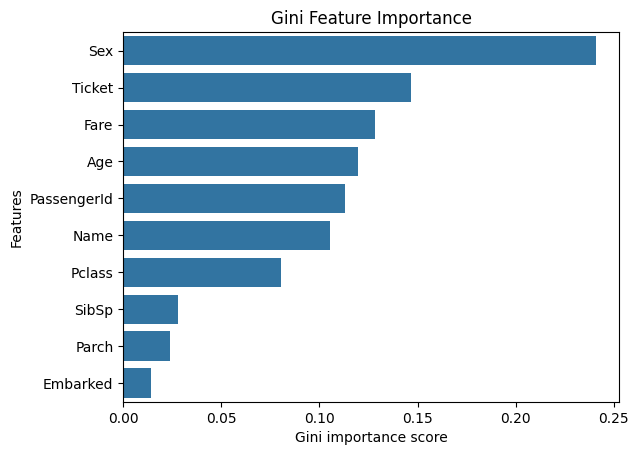

In [46]:
# Creating a seaborn bar plot
sns.barplot(x = feature_imp_titanic['Gini Importance'],y = feature_imp_titanic['Feature'],data = feature_imp_titanic)
plt.title("Gini Feature Importance")
plt.xlabel("Gini importance score")
plt.ylabel("Features")

In [47]:
# Dropping the least important feature from X_train and X_test
X_train_gini = X_train.drop(['Embarked'], axis = 1)
X_test_gini = X_test.drop(['Embarked'], axis = 1)

# Creating Random Forest Classifier

r = 42
rf_gini = RandomForestClassifier(random_state = r)
rf_gini.fit(X_train_gini,y_train)

# Predicting the response for test dataset for the models
y_test_pred_rf_gini = rf_gini.predict(X_test_gini)

print(f'Testing Accuracy for Random Forest model: {accuracy_score(y_test, y_test_pred_rf)}')
print(f'Testing Accuracy for Random Forest model with Gini importance: {accuracy_score(y_test, y_test_pred_rf_gini)}')

Testing Accuracy for Random Forest model: 0.8333333333333334
Testing Accuracy for Random Forest model with Gini importance: 0.8333333333333334


In [48]:
# Permutation feature importance
from sklearn.inspection import permutation_importance
result = permutation_importance(rf, X_test, y_test, n_repeats = 10, random_state = 0, n_jobs = -1)
perm_imp_titanic = pd.DataFrame({'Feature': X_train.columns, 'Permutation Importance': result.importances_mean}).sort_values('Permutation Importance', ascending=False)
perm_imp_titanic

Feature  Permutation Importance
3          Sex                0.143056
4          Age                0.052778
7       Ticket                0.043056
1       Pclass                0.040278
8         Fare                0.019444
9     Embarked                0.011111
5        SibSp                0.004167
6        Parch                0.001389
2         Name               -0.001389
0  PassengerId               -0.016667

Text(0, 0.5, 'Features')

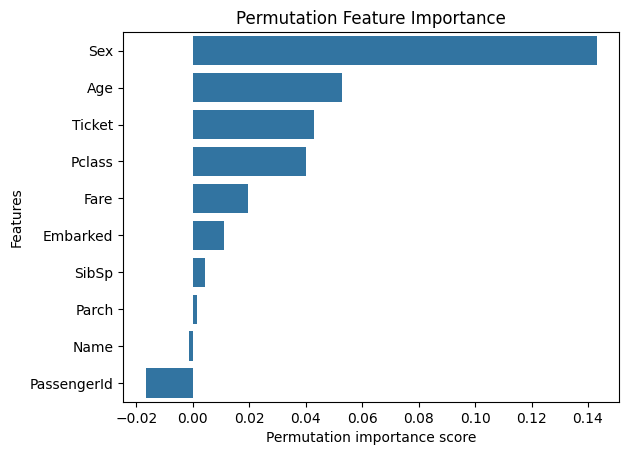

In [53]:
# Creating a seaborn bar plot
sns.barplot(x = perm_imp_titanic['Permutation Importance'],y = perm_imp_titanic['Feature'],data = perm_imp_titanic)
plt.title("Permutation Feature Importance")
plt.xlabel("Permutation importance score")
plt.ylabel("Features")


In [54]:
# Dropping the least important feature from X_train and X_test
X_train_perm = X_train.drop(['PassengerId'], axis = 1)
X_test_perm = X_test.drop(['PassengerId'], axis = 1)

# Creating Random Forest Classifier

r = 42
rf_perm = RandomForestClassifier(random_state = r)
rf_perm.fit(X_train_perm,y_train)

# Predicting the response for test dataset for the models
y_test_pred_rf_perm = rf_perm.predict(X_test_perm)

print(f'Testing Accuracy for Random Forest model: {accuracy_score(y_test, y_test_pred_rf)}')
print(f'Testing Accuracy for Random Forest model with permutation importance: {accuracy_score(y_test, y_test_pred_rf_perm)}')

Testing Accuracy for Random Forest model: 0.8333333333333334
Testing Accuracy for Random Forest model with permutation importance: 0.8611111111111112


In [55]:
#drop the least important feature from X_train and X_test
X_train = X_train.drop(['PassengerId'], axis = 1)
X_test = X_test.drop(['PassengerId'], axis = 1)

In [56]:
# Hyperparameter tuning for Random Forest using GridSearchCV and fit the data.
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs = -1, verbose=1, scoring = "accuracy")

grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [57]:
#Check best score hyperparameters
print(grid_search.best_score_)
rf_best = grid_search.best_estimator_
rf_best

0.8102654387865655


RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=25,
                       random_state=42)

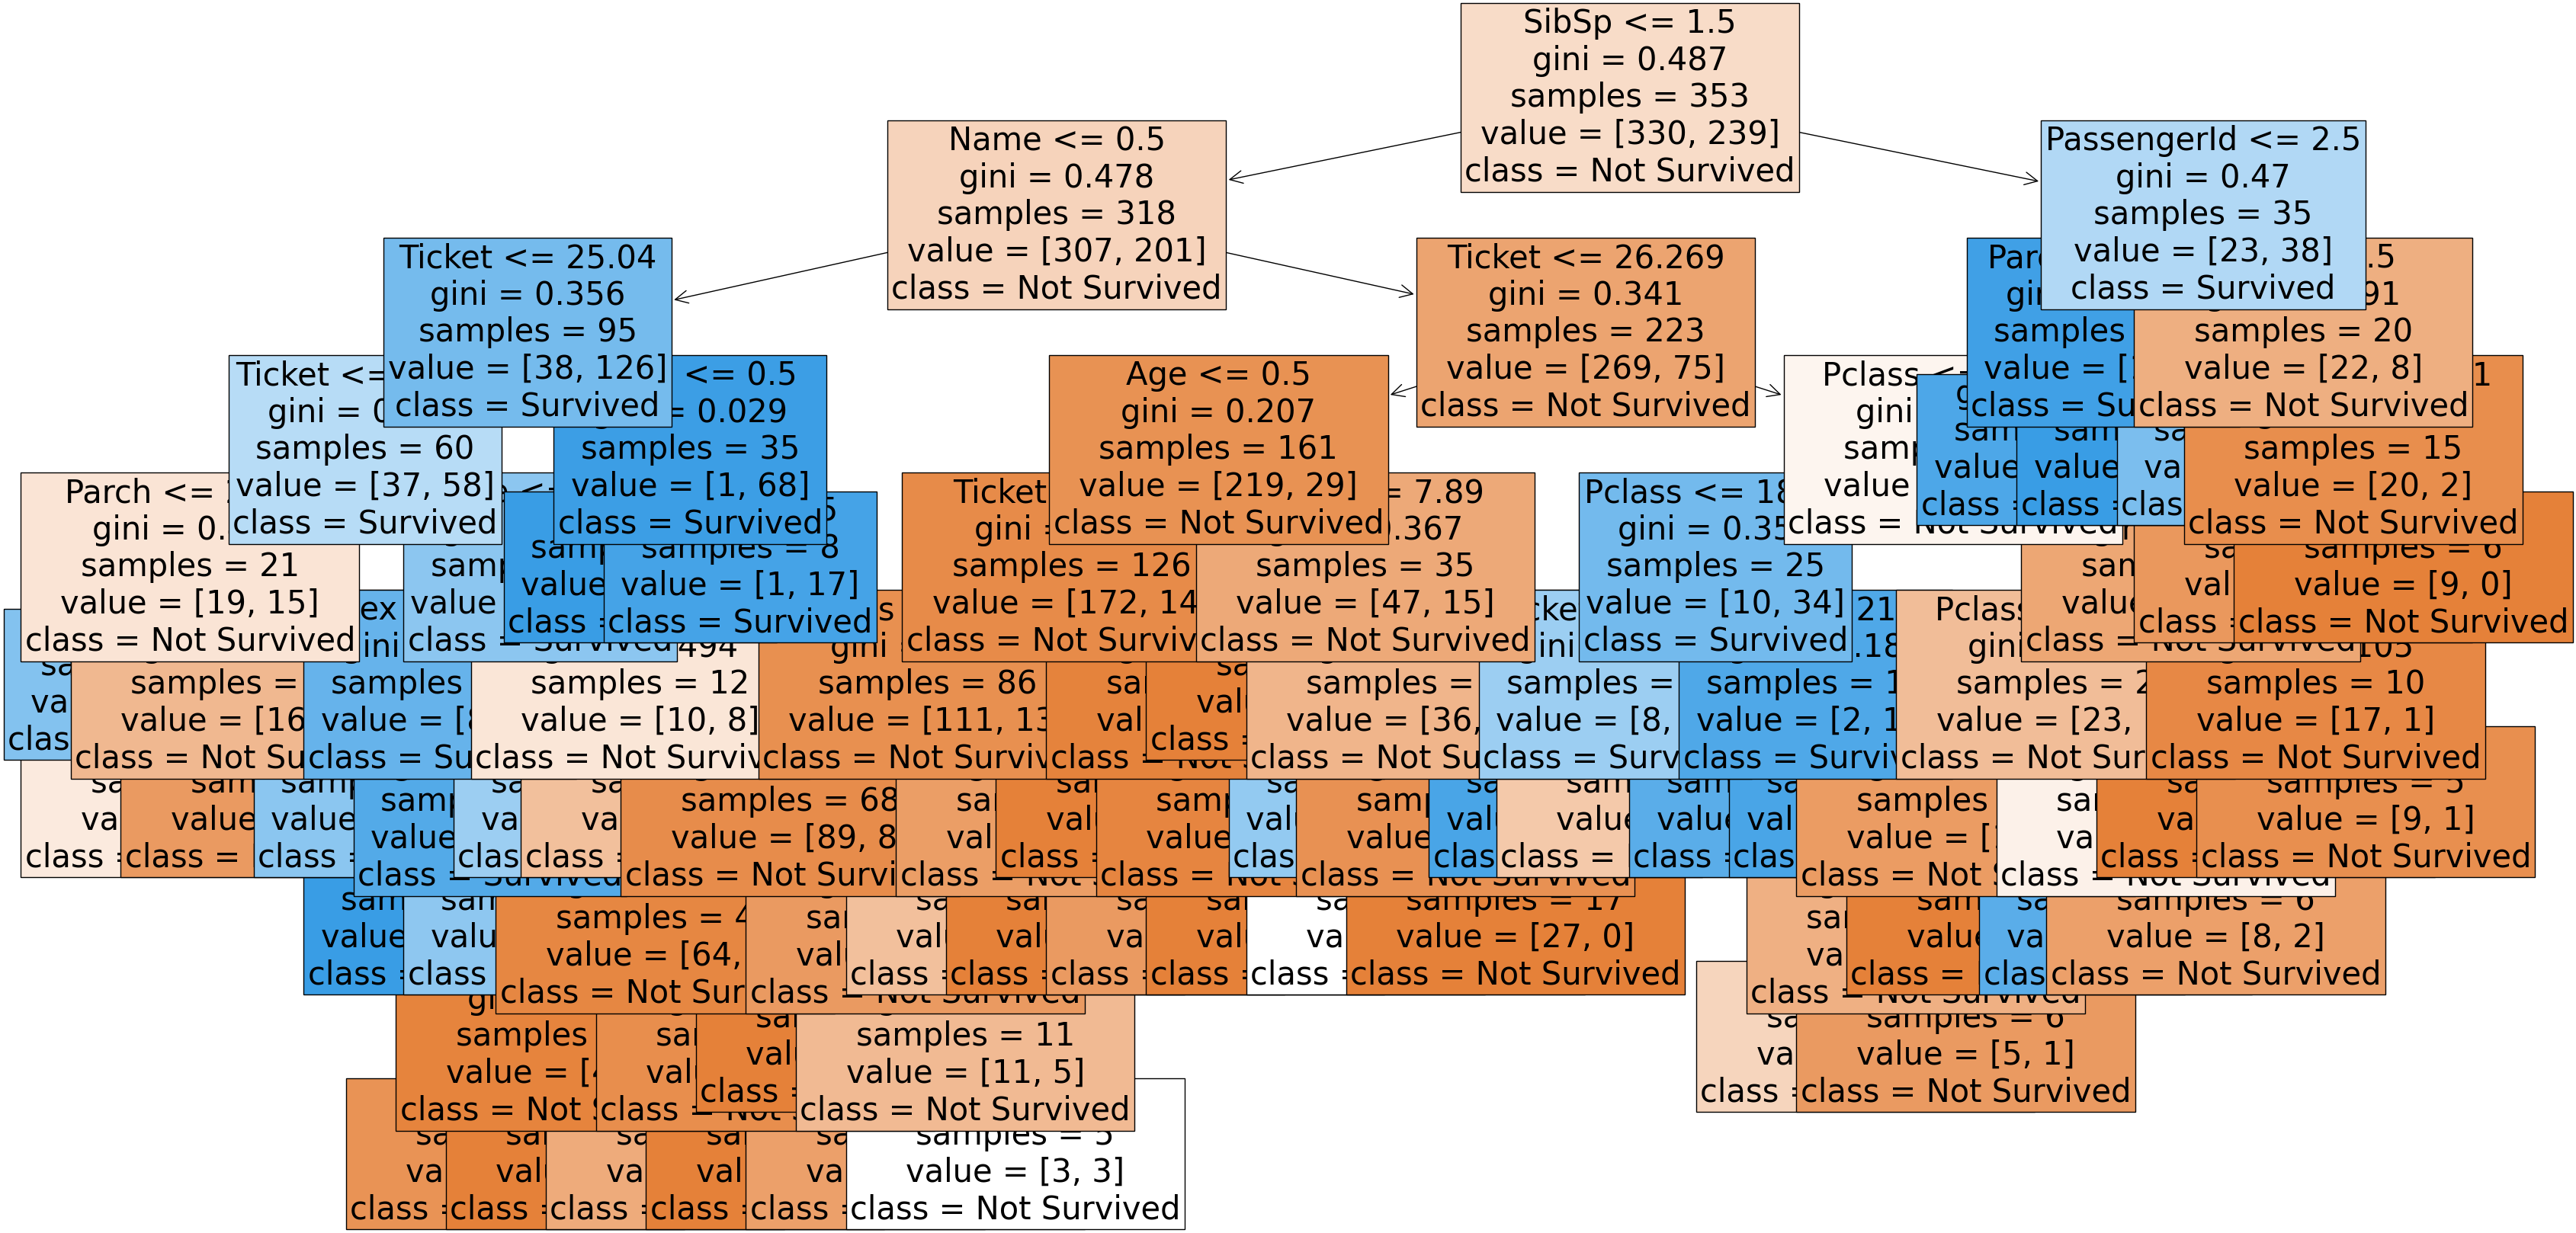

In [61]:
# Ploting one tree
plt.figure(figsize=(40,20))
tree.plot_tree(rf_best.estimators_[3], feature_names = X.columns,class_names=['Not Survived', 'Survived'],filled=True,fontsize=30)
plt.show()

In [62]:
# Creating base model which is a Decision Tree classifer object, training a model without pruning
# The next one is an ensemble model, BaggingClassifier
# Then we are using the Random Forest Classifier, with and without hyperparameters
r = 42
base = DecisionTreeClassifier(max_depth = None,random_state = r)
ensemble = BaggingClassifier(estimator = base, n_estimators = 100, random_state = r)
rf = RandomForestClassifier(random_state = r)
rf_hp = RandomForestClassifier(max_depth = 10, min_samples_leaf = 5, n_estimators = 120, random_state = r)

# Train the  classifiers
base.fit(X_train,y_train)
ensemble.fit(X_train,y_train)
rf.fit(X_train,y_train)
rf_hp.fit(X_train,y_train)

# Predicting the response for test dataset for the models
y_test_pred_base = base.predict(X_test)
y_test_pred_ensemble = ensemble.predict(X_test)
y_test_pred_rf = rf.predict(X_test)
y_test_pred_rf_hp = rf_hp.predict(X_test)

print(f'Testing Accuracy for base Decision Tree model: {accuracy_score(y_test, y_test_pred_base)}')
print(f'Testing Accuracy for ensemble Bagging model: {accuracy_score(y_test, y_test_pred_ensemble)}')
print(f'Testing Accuracy for Random Forest model: {accuracy_score(y_test, y_test_pred_rf)}')
print(f'Testing Accuracy for Random Forest model with hyperparameters: {accuracy_score(y_test, y_test_pred_rf_hp)}')

Testing Accuracy for base Decision Tree model: 0.6527777777777778
Testing Accuracy for ensemble Bagging model: 0.8333333333333334
Testing Accuracy for Random Forest model: 0.8611111111111112
Testing Accuracy for Random Forest model with hyperparameters: 0.8333333333333334



The Random Forest without hyperparameter tuning is the best model as model's accuracy is the highest as compare to other model's.
Best Model : Random Forest
Testing Accuracy :  0.8611111111111112
n_estimator's : 25
max_depth : 10

